# Group 3 - Phase 1

Roland Joseph Baja - 301252375

# Phase 1 Requirements

Deliverables:
Phase #1
1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.
For example, look at:
a. Counts, averages
b. Distribution of the number of reviews across products
c. Distribution of the number of reviews per product
d. Distribution of reviews per user
e. Review lengths and outliers
f. Analyze lengths
g. Check for duplicates
2. Text basic pre-processing:
a. Label your data based on the value of “rating of the product” i.e. as follows:
i. Ratings 4,5: Positive
ii. Rating 3: Neutral
iii. Ratings 1,2: Negative
b. Choose the appropriate columns for your sentiment analyzer. (Give this some
thought) and mention in your report why you chose each column.
c. Check for outliers
3. Study the below three Lexicons packages and choose two for model building justify why
you chose them:
i. Valence Aware Dictionary and Sentiment Reasoner (VADR) you can find
out more information here: https://github.com/cjhutto/vaderSentiment
ii. TextBlob you can find out more information here:
https://textblob.readthedocs.io/en/dev/quickstart.html
iii. SENTIWORDNET you can find more information here:
http://nmis.isti.cnr.it/sebastiani/Publications/LREC10.pdf
4. Pre-process your text as needed, justify each pre-processing step for each model you
chose. (Note: take into account the findings of step #3 above)
5. Randomly select 1000 reviews from your dataset.
6. Modeling (Sentiment Analysis) Lexicon approach:
a. Build two sentiment analysis models using the labeled pre-processed data for
both the lexicons packages the team selected in step #3 above.
7. Validate the results of both models and provide a comparison table.
8. Presentation: Check project presentation requirements.
9. Project report: Check project report requirements/ phase #1 (Make sure you reference
your work)
10. Submit documented code.



# 1. Dataset data exploration

In [1]:
#All Imported Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import contractions
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


from sklearn.utils import resample
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix



C:\Users\rolan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# read and load Appliances.json to data frame
df = pd.read_json("Appliances_5.json", lines=True)

In [3]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         2277 non-null   int64 
 1   verified        2277 non-null   bool  
 2   reviewTime      2277 non-null   object
 3   reviewerID      2277 non-null   object
 4   asin            2277 non-null   object
 5   style           38 non-null     object
 6   reviewerName    2277 non-null   object
 7   reviewText      2277 non-null   object
 8   summary         2277 non-null   object
 9   unixReviewTime  2277 non-null   int64 
 10  vote            2074 non-null   object
 11  image           828 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 198.0+ KB


In [4]:
#all List of Data Frame
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2272,5,True,"12 6, 2016",A2B2JVUX5YN8RU,B0006GVNOA,NaN,Caleb,Works great. I used it and an extension kit wi...,Worked like a charm,1480982400,6,[https://images-na.ssl-images-amazon.com/image...
2273,5,True,"03 20, 2016",A1IT56MV1C09VS,B0006GVNOA,NaN,Looneypenguin,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...,1458432000,5,[https://images-na.ssl-images-amazon.com/image...
2274,5,True,"10 15, 2016",A13391AZAFJ67K,B00570RQ0A,NaN,Fred A,good,Five Stars,1476489600,NaN,NaN
2275,5,True,"01 5, 2016",A2V0JXLJ9VCNNX,B00570RQ0A,NaN,Amazon Customer,washer washing,Five Stars,1451952000,NaN,NaN


# Title/Column Description
overall - Product Rating(int64)

verified - Product Verified(bool)

reviewTime - Time of the review(object)

reviewerID - ID of the reviewer(object)

asin- ID of the Product also known as Amazon Standard Identification Number(object)

style-style of the product(object)

reviewerName- The name of the reviewer of the product(object)

reviewText- Review of the product(object)

summary- Summary of the review(object)

unixReviewTime-(int64 )

vote - Votes if review is helpful or not (object)

image- Image from the user/reviewer(object)


In [5]:
#Data Frame Description
df.describe()

,overall,unixReviewTime
count,2277.000000,2.277000e+03
mean,4.499780,1.457410e+09
std,0.837723,5.639808e+07
min,1.000000,1.221523e+09
25%,4.000000,1.449274e+09
50%,5.000000,1.478650e+09
75%,5.000000,1.482278e+09
max,5.000000,1.523923e+09


In [6]:
df.count()

overall           2277
verified          2277
reviewTime        2277
reviewerID        2277
asin              2277
style               38
reviewerName      2277
reviewText        2277
summary           2277
unixReviewTime    2277
vote              2074
image              828
dtype: int64

In [7]:
#Product
print("Product ID Breakdown:", df['asin'].value_counts(), "\n")
print("Product Style Breakdown:", df['style'].value_counts(), "\n")
print("Verified Breakdown:", df['verified'].value_counts(), "\n")

Product ID Breakdown: B0006GVNOA    2040
B0014CN8Y8      24
B00JGTUQJ6      13
B0015UGPWQ      12
B00CW0O1EW       8
B0056I99WG       8
B004XLDE5A       8
B000XXWOGW       8
B0053F80JA       7
B000NCTOUM       7
B000N6302Q       7
B00P9C66PM       7
B001DPFP88       7
B00570RQ0A       6
B00DM8J11Q       6
B00MGMWTQS       6
B001769IVI       6
B001DHLGOS       6
B00126NABC       6
B004XLDDNI       5
B00470A1S0       5
B008YDSH6E       5
B004XLDHSE       5
B004UB1O9Q       5
B00W4YKCGC       5
B00009W3PA       5
B00DM8JA7Q       5
B000VL060M       4
B0053F7TQA       4
B000XXYUSM       4
B00DM8KQ2Y       4
B00AHR3IG4       4
B0042U16YI       2
B0013DN4NI       2
B00147DFQ4       2
B00186NSGS       2
B00149JVOC       2
B000XTJRRA       2
B000W3P4AQ       2
B000VLI74Y       2
B0015S4KIO       2
B00009W3I4       1
B00BIZDI0A       1
B009PCI2JU       1
B0045LLC7K       1
B001DPQPKU       1
B0009GVYNW       1
B0042ACZU2       1
Name: asin, dtype: int64 

Product Style Breakdown: {'Size Name:':

In [8]:
#Rating
print("Overall/Star Breakdown:", df['overall'].value_counts(), "\n")
print("Summary Breakdown:", df['summary'].value_counts(), "\n")
print("Vote Breakdown:", df['vote'].value_counts(), "\n")

Overall/Star Breakdown: 5    1612
3     421
4     222
2      13
1       9
Name: overall, dtype: int64 

Summary Breakdown: This really worked well even taking shortcuts                                     206
good kit with some caveats                                                        206
A great device that has my dryer working well again. Simple instructions here.    206
Works Great, Just Use Common Sense When Doing It!!!                               206
Worked like a charm                                                               206
                                                                                 ... 
worth the money                                                                     1
Does what it is supposed to do                                                      1
Bought a Warehouse deal and it was damaged. Lesson learned.                         1
One Star                                                                            1
Could not beat th

In [9]:
#Reviewer
print("Reviewer ID Breakdown:", df['reviewerID'].value_counts(), "\n")
print("Reviewer Name Breakdown:", df['reviewerName'].value_counts(), "\n")



Reviewer ID Breakdown: A8WEXFRWX1ZHH     206
A1WD61B0C3KQZB    206
A25C30G90PKSQA    206
A2B2JVUX5YN8RU    206
AMY6O4Z9HINO0     206
A3TMNU7VNK5JJE    206
A1IT56MV1C09VS    206
A2LDP3A4IE9T6T    206
A21TPY9BVC9IKZ    206
A3VYM3NY7W4MX4    206
A13391AZAFJ67K      9
A3GP2HMB2AFOKF      8
A37DQO5LU8DXTV      8
A6FPI5CM4W5WB       8
A1Y4UNHRP312HS      7
A2V0JXLJ9VCNNX      7
A26M3TN8QICJ3K      7
ALZOND1IEW8KS       7
A1EUO0BU72JR7T      7
AFUVGAUNQVT0S       6
A34A1UP40713F8      6
A3LGZ8M29PBNGG      6
A3NHUQ33CFH3VM      6
A2CIEGHZ7L1WWR      6
A11SCLK8GDDN3C      6
A1LN48DHHCKLR3      6
A2OP8DEIIUESP       6
A1T1YSCDW0PD25      6
A1H2V1GNEY4LZ0      5
A8R48NKTGCJDQ       5
A2O7BWHBIV1HWZ      5
AR3OHHHW01A8E       5
A1AHW6I678O6F2      5
A329823SXZ8IBE      5
AVGG8CYK8K312       5
A3H61AMBJ177DG      5
A1RQQV9HYHDHDN      5
A23KSPVPHZF6EO      5
A3J8IC20SGBS2O      5
A1OB2H416ARLFJ      5
A1HWFUO5PKB2RW      5
A3SM7H70QI3TY8      5
A3B1B4E184FSUZ      5
AJPRN1TD1A0SD       5
A1AJW9DIL

In [10]:
#Time
print("unixReviewTime Breakdown:", df['unixReviewTime'].value_counts(), "\n")
print("Review Time Breakdown:", df['reviewTime'].value_counts(), "\n")


unixReviewTime Breakdown: 1480982400    412
1482278400    207
1487980800    206
1299024000    206
1515974400    206
             ... 
1486339200      1
1473379200      1
1441584000      1
1411344000      1
1480896000      1
Name: unixReviewTime, Length: 99, dtype: int64 

Review Time Breakdown: 12 6, 2016     412
12 21, 2016    207
02 25, 2017    206
03 2, 2011     206
01 15, 2018    206
              ... 
02 6, 2017       1
09 9, 2016       1
09 7, 2015       1
09 22, 2014      1
12 5, 2016       1
Name: reviewTime, Length: 99, dtype: int64 



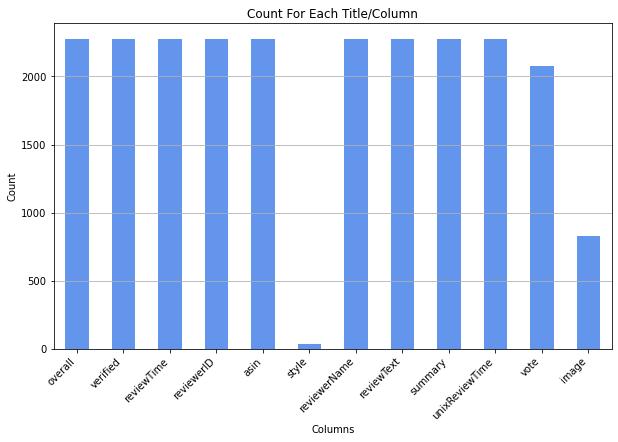

In [11]:
# Plot bar per Title
plt.figure(figsize=(10, 6))
df.count().plot(kind='bar', color='cornflowerblue')
plt.title('Count For Each Title/Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='solid', alpha=1)
plt.show()

In [12]:
#Count and Average of overall and review time

print("Overall Average =",df['overall'].mean())
print("Product ID Average =",df['unixReviewTime'].mean())



print("Overall  Counts =",df['overall'].count())
print("Product ID  Counts =",df['asin'].count())

Overall Average = 4.499780412823891
Product ID Average = 1457410226.0869565
Overall  Counts = 2277
Product ID  Counts = 2277


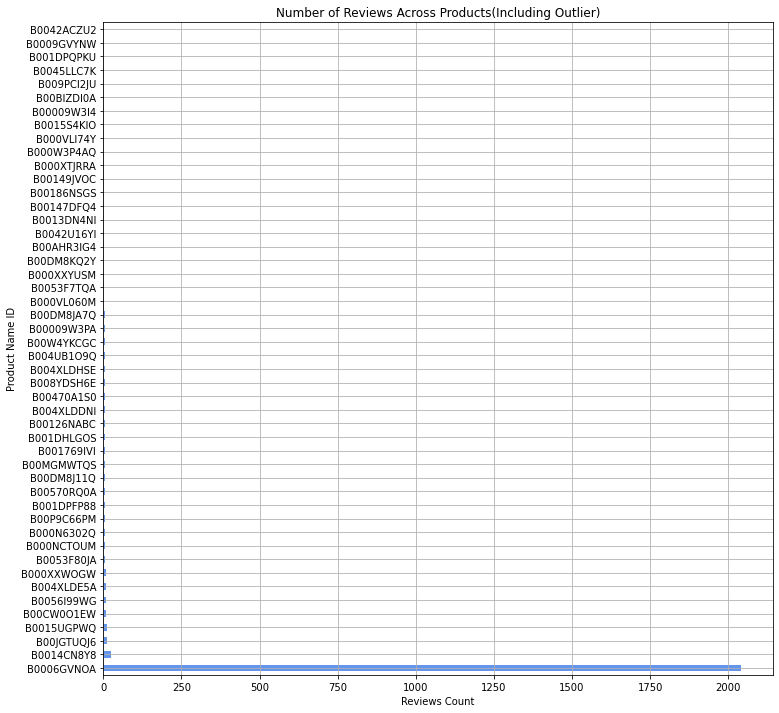

In [13]:
# number of reviews per product
plt.figure(figsize=(12, 12))
df['asin'].value_counts().plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews Across Products(Including Outlier)')
plt.ylabel('Product Name ID')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

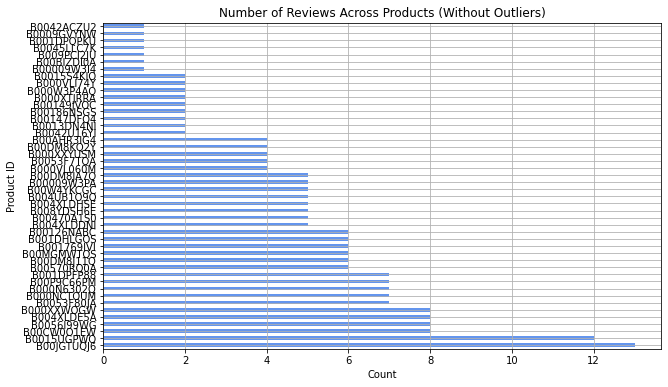

In [14]:
# Assigning Value to Q1 and Q3
Q1 = df['asin'].value_counts().quantile(0.25)
Q3 = df['asin'].value_counts().quantile(0.75)
# IQR= Interquartile range
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_quartile = Q1 - 1.5 * IQR
upper_quartile = Q3 + 1.5 * IQR

# Filter/removing outliers
filtered = df['asin'].value_counts()[(df['asin'].value_counts() >= lower_quartile) & (df['asin'].value_counts() <= upper_quartile)]

# Plot bar chart for filtered 'asin' value counts
plt.figure(figsize=(10, 6))
filtered.plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews Across Products (Without Outliers)')
plt.xlabel('Count')
plt.ylabel('Product ID')
plt.grid( linestyle='solid', alpha=1)
plt.show()

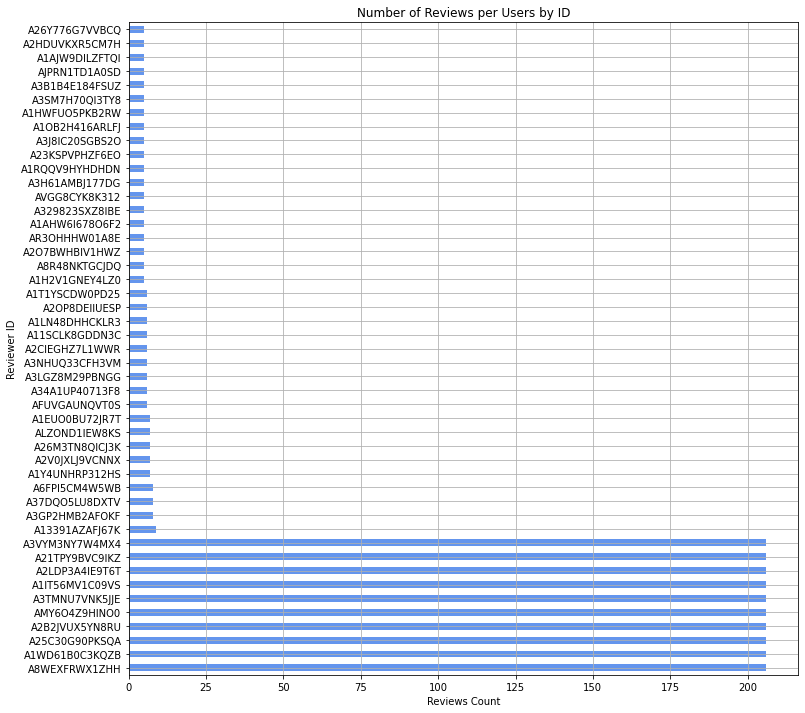

In [15]:
# number of reviews per product
plt.figure(figsize=(12, 12))
df['reviewerID'].value_counts().plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews per Users by ID')
plt.ylabel('Reviewer ID')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

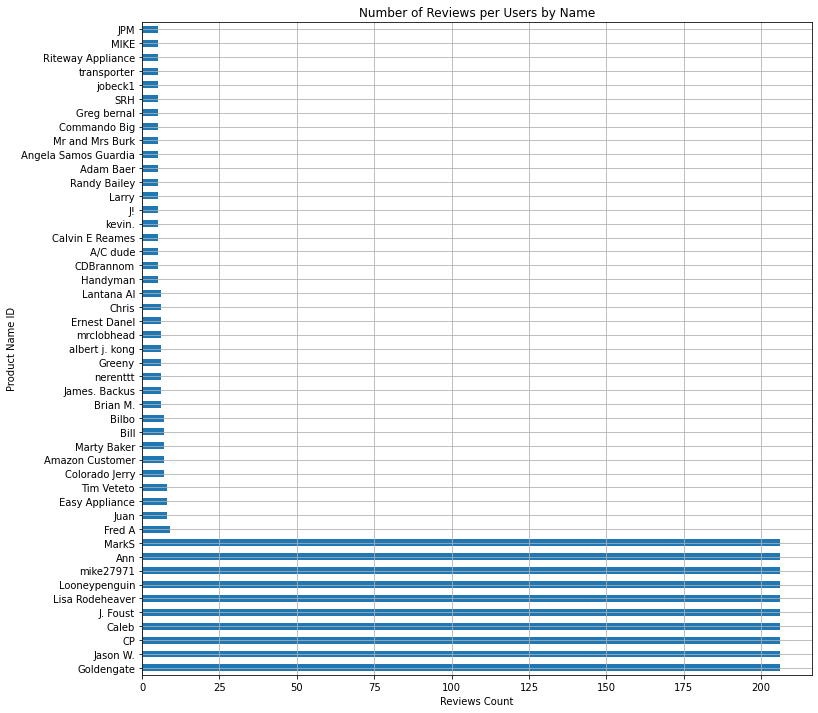

In [16]:
# number of User reviews
plt.figure(figsize=(12, 12))
df['reviewerName'].value_counts().plot(kind='barh')
plt.title('Number of Reviews per Users by Name')
plt.ylabel('Product Name ID')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

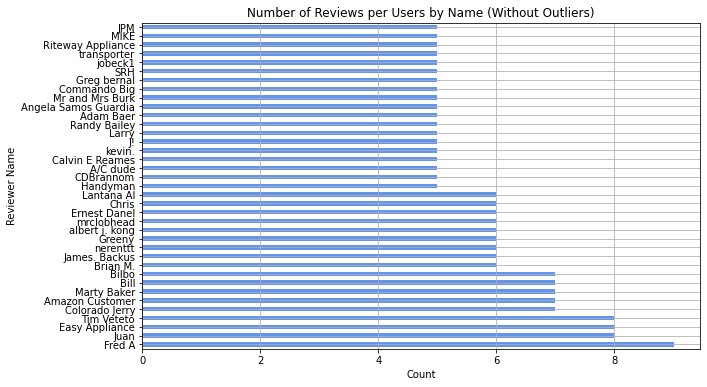

In [17]:
# Assigning Value to Q1 and Q3
Q1 = df['reviewerName'].value_counts().quantile(0.25)
Q3 = df['reviewerName'].value_counts().quantile(0.75)
# IQR= Interquartile range
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_quartile = Q1 - 1.5 * IQR
upper_quartile = Q3 + 1.5 * IQR

# Filter/removing outliers
filtered = df['reviewerName'].value_counts()[(df['reviewerName'].value_counts() >= lower_quartile) & (df['reviewerName'].value_counts() <= upper_quartile)]

# Plot bar chart for filtered 'asin' value counts
plt.figure(figsize=(10, 6))
filtered.plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews per Users by Name (Without Outliers)')
plt.xlabel('Count')
plt.ylabel('Reviewer Name')
plt.grid( linestyle='solid', alpha=1)
plt.show()

Number of Verified(True) vs Unverified(False) True     2248
False      29
Name: verified, dtype: int64


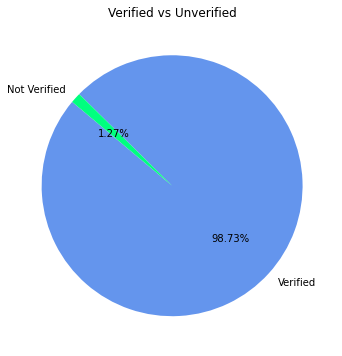

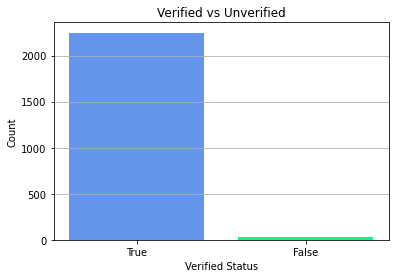

In [18]:
#verified reviews count distribution
print("Number of Verified(True) vs Unverified(False)",df['verified'].value_counts())

labels = ['Verified','Not Verified']
value_counts = df['verified'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%2.2f%%', startangle=140, colors = ['cornflowerblue', 'springgreen'])
plt.title('Verified vs Unverified')
plt.grid( linestyle='solid', alpha=1)
plt.show()

plt.bar(value_counts.index.astype(str), value_counts.values, color=['cornflowerblue', 'springgreen'])
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.title('Verified vs Unverified')
plt.grid(axis='y', linestyle='solid', alpha=1)

plt.show()

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# 2. Text basic pre-processing

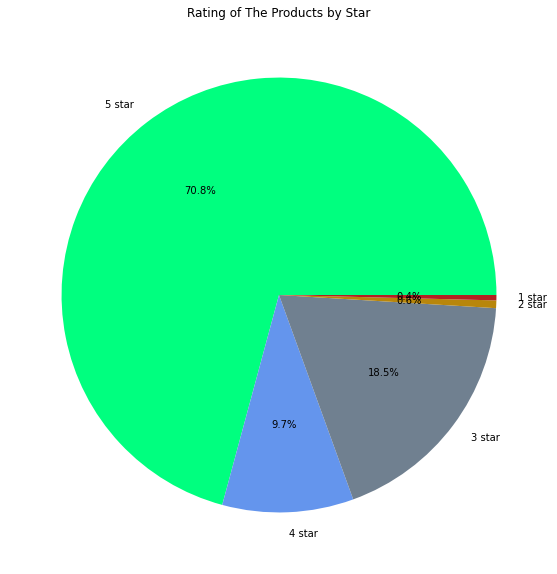

In [20]:
# Pie Chart
value_counts = df['overall'].value_counts()
min_rating = df['overall'].min()
max_rating = df['overall'].max()
labels = [f"{i} star" for i in range(max_rating, min_rating - 1, -1)]

# Sorting counts in descending order
sorted_counts = value_counts.sort_index(ascending=False)

# Plotting the pie chart with dynamically generated labels and sorted counts
plt.figure(figsize=(10, 10))
plt.pie(sorted_counts, labels=labels, autopct='%1.1f%%', labeldistance=1.10, colors = ['springgreen', 'cornflowerblue','slategray', 'darkgoldenrod','firebrick'] )
plt.title('Rating of The Products by Star')
plt.show()


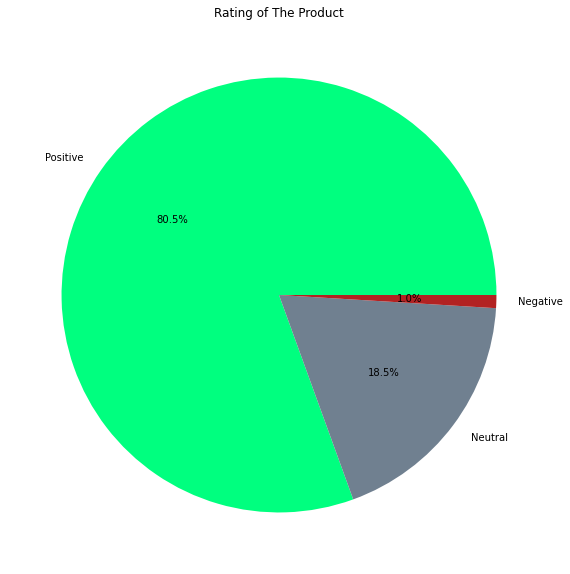

Counts of each category:
Positive    1834
Neutral      421
Negative      22
Name: rating, dtype: int64


In [21]:
# Creating a copy of df to avoid changing original
df_copy = df.copy()

# Giving value:(x<2 = Negative, x=3 Neutral, everything else Positive)
df_copy['rating'] = df_copy['overall'].apply(lambda x: 'Negative' if x <= 2 else ('Neutral' if x == 3 else 'Positive'))

plt.figure(figsize=(10, 10))
plt.pie(df_copy['rating'].value_counts(), labels=df_copy['rating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product')
plt.show()

print("Counts of each category:")
print(df_copy['rating'].value_counts())

In [22]:
df_copy

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,rating
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN,Positive
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN,Positive
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN,Positive
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN,Positive
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,5,True,"12 6, 2016",A2B2JVUX5YN8RU,B0006GVNOA,NaN,Caleb,Works great. I used it and an extension kit wi...,Worked like a charm,1480982400,6,[https://images-na.ssl-images-amazon.com/image...,Positive
2273,5,True,"03 20, 2016",A1IT56MV1C09VS,B0006GVNOA,NaN,Looneypenguin,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...,1458432000,5,[https://images-na.ssl-images-amazon.com/image...,Positive
2274,5,True,"10 15, 2016",A13391AZAFJ67K,B00570RQ0A,NaN,Fred A,good,Five Stars,1476489600,NaN,NaN,Positive
2275,5,True,"01 5, 2016",A2V0JXLJ9VCNNX,B00570RQ0A,NaN,Amazon Customer,washer washing,Five Stars,1451952000,NaN,NaN,Positive


In [23]:
# Choosing the appropriate columns for your sentiment analyzer.
selected_columns = df_copy[['overall','rating', 'reviewText','summary']]
selected_columns

,overall,rating,reviewText,summary
0,5,Positive,I like this as a vent as well as something tha...,Great product
1,5,Positive,good item,Five Stars
2,5,Positive,Fit my new LG dryer perfectly.,Five Stars
3,5,Positive,Good value for electric dryers,Perfect size
4,5,Positive,Price and delivery was excellent.,Five Stars
...,...,...,...,...
2272,5,Positive,Works great. I used it and an extension kit wi...,Worked like a charm
2273,5,Positive,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...
2274,5,Positive,good,Five Stars
2275,5,Positive,washer washing,Five Stars


In [24]:
df['text_length'] = df['reviewText'].apply(len)

Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_quantile = Q1 - 1.5 * IQR
upper_quantile = Q3 + 1.5 * IQR

# Identify outliers based on the lower and upper bounds
outliers = df[(df['text_length'] < lower_quantile) | (df['text_length'] > upper_quantile)]

# Display outliers
print("Text outliers based on IQR method:")
outliers[['reviewText', 'text_length', 'summary']]


Text outliers based on IQR method:


,reviewText,text_length,summary
9,"Be careful, NewAir will not stand by their pro...",3932,NewAir will not stand behind their products - ...
11,"Be careful, NewAir will not stand by their pro...",3932,NewAir will not stand behind their products - ...
38,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
77,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
118,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
...,...,...,...
2108,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2118,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2128,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2138,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...


# 3. Two Lexicons Packages

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rolan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Function to preprocess text using VADER and return compound sentiment score
def preprocess_text_with_vader(text):
    # Analyze sentiment of the text
    sentiment = sia.polarity_scores(text)
    # Return compound score (normalized sum of all lexicon ratings)
    return sentiment['compound']

# Preprocess column using VADER(recommended Positve x >= 0.05, Negative x <= -0.05 Neutral, is between)
df_copy['reviewText_vaderValue'] = df_copy['reviewText'].apply(preprocess_text_with_vader)
df_copy['reviewText_vaderRating'] = df_copy['reviewText_vaderValue'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


df_copy[['overall', 'rating', 'reviewText', 'reviewText_vaderValue', 'reviewText_vaderRating']]

,overall,rating,reviewText,reviewText_vaderValue,reviewText_vaderRating
0,5,Positive,I like this as a vent as well as something tha...,0.8720,Positive
1,5,Positive,good item,0.4404,Positive
2,5,Positive,Fit my new LG dryer perfectly.,0.7717,Positive
3,5,Positive,Good value for electric dryers,0.6486,Positive
4,5,Positive,Price and delivery was excellent.,0.5719,Positive
...,...,...,...,...,...
2272,5,Positive,Works great. I used it and an extension kit wi...,0.9591,Positive
2273,5,Positive,Anyone who thinks they don't have a problem wi...,0.9443,Positive
2274,5,Positive,good,0.4404,Positive
2275,5,Positive,washer washing,0.0000,Neutral


In [27]:
# Preprocess column using VADER(recommended Positve x >= 0.05, Negative x <= -0.05 Neutral, is between)
df_copy['summary_vaderValue'] = df_copy['summary'].apply(preprocess_text_with_vader)
df_copy['summary_vaderRating'] = df_copy['summary_vaderValue'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


df_copy[['overall', 'rating', 'reviewText', 'summary','summary_vaderValue', 'summary_vaderRating']]

,overall,rating,reviewText,summary,summary_vaderValue,summary_vaderRating
0,5,Positive,I like this as a vent as well as something tha...,Great product,0.6249,Positive
1,5,Positive,good item,Five Stars,0.0000,Neutral
2,5,Positive,Fit my new LG dryer perfectly.,Five Stars,0.0000,Neutral
3,5,Positive,Good value for electric dryers,Perfect size,0.5719,Positive
4,5,Positive,Price and delivery was excellent.,Five Stars,0.0000,Neutral
...,...,...,...,...,...,...
2272,5,Positive,Works great. I used it and an extension kit wi...,Worked like a charm,0.6369,Positive
2273,5,Positive,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...,0.5719,Positive
2274,5,Positive,good,Five Stars,0.0000,Neutral
2275,5,Positive,washer washing,Five Stars,0.0000,Neutral


# 4. Pre-process your text as needed, justify each pre-processing step for each model you

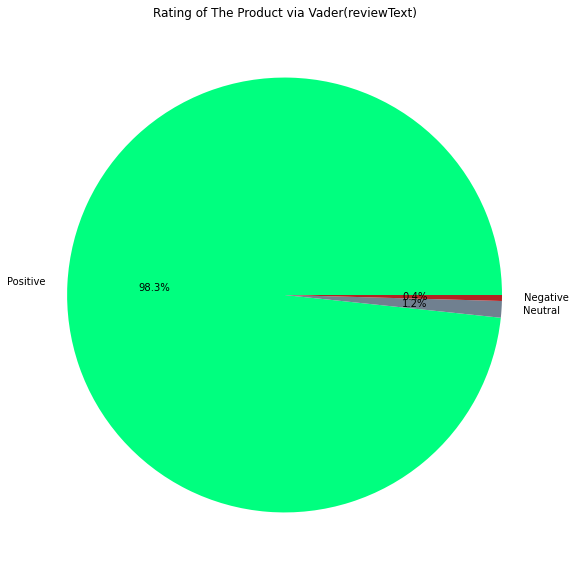

Counts of each category:
Positive    2239
Neutral       28
Negative      10
Name: reviewText_vaderRating, dtype: int64


In [28]:
plt.figure(figsize=(10, 10))
plt.pie(df_copy['reviewText_vaderRating'].value_counts(), labels=df_copy['reviewText_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product via Vader(reviewText)')
plt.show()

print("Counts of each category:")
print(df_copy['reviewText_vaderRating'].value_counts())

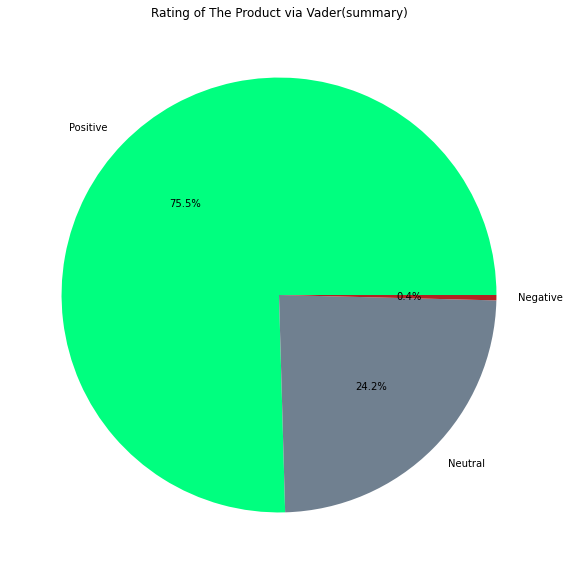

Counts of each category:
Positive    1718
Neutral      550
Negative       9
Name: summary_vaderRating, dtype: int64


In [29]:
plt.figure(figsize=(10, 10))
plt.pie(df_copy['summary_vaderRating'].value_counts(), labels=df_copy['summary_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product via Vader(summary)')
plt.show()

print("Counts of each category:")
print(df_copy['summary_vaderRating'].value_counts())

In [30]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Creating a copy of df to avoid changing original
df_copy4text = df.copy()

# 5 Randomly select 1000 reviews from your dataset

In [ ]:
# Randomly select 1000 reviews from your dataset.
random_df = df.sample(n=1000, random_state=75)
random_df
